In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('model_comparison_predictions.csv')
df['roberta_roberta__pred_topk_idxs'] = df['roberta_roberta__pred_topk_idxs'].map(eval)
df['roberta_tapas__pred_topk_idxs'] = df['roberta_tapas__pred_topk_idxs'].map(eval)
df['roberta_roberta__pred_topk_values'] = df['roberta_roberta__pred_topk_values'].map(eval)
df['roberta_tapas__pred_topk_values'] = df['roberta_tapas__pred_topk_values'].map(eval)
df['roberta_tapas__was_correct'] = df['roberta_tapas__was_correct'].map(bool)
df['roberta_roberta__was_correct'] = df['roberta_roberta__was_correct'].map(bool)

In [26]:
import sys
sys.path.append('/home/jxm3/research/deidentification/unsupervised-deidentification')

from dataloader import WikipediaDataModule

import numpy as np


num_cpus = 8

dm = WikipediaDataModule(
    document_model_name_or_path='roberta-base',
    profile_model_name_or_path='google/tapas-base',
    dataset_name='wiki_bio',
    dataset_train_split='train[:100%]',
    dataset_val_split='val[:100%]',
    dataset_test_split='test[:100%]',
    dataset_version='1.2.0',
    num_workers=num_cpus,
    train_batch_size=256,
    eval_batch_size=256,
    max_seq_length=128,
    sample_spans=False,
)
dm.setup("fit")

Initializing WikipediaDataModule with num_workers = 8 and mask token `<mask>`
loading wiki_bio[1.2.0] split train[:100%]
loading wiki_bio[1.2.0] split val[:100%]
loading wiki_bio[1.2.0] split test[:100%]
                        

In [27]:
model_a = 'roberta_roberta'
model_b = 'roberta_tapas'

In [28]:
df.head()

,Unnamed: 0,perturbed_text,model_name,i,k,roberta_roberta__pred_topk_values,roberta_roberta__pred_topk_idxs,roberta_tapas__pred_topk_values,roberta_tapas__pred_topk_idxs,roberta_roberta__was_correct,roberta_tapas__was_correct
0,0,"leonard shenoff <mask> ( born february 12 , <m...",roberta_tapas__no_masking,0,1,"[0.9138374924659729, 0.019291497766971588, 0.0...","[0, 578457, 120349, 267136, 532648, 719788, 49...","[0.8143362402915955, 0.022000230848789215, 0.0...","[0, 5473, 685461, 144197, 267136, 724119, 1798...",True,True
1,1,<mask> <mask> ( born 25 august <mask> in rhège...,roberta_tapas__no_masking,1,1,"[0.9647166728973389, 0.0008567320764996111, 0....","[1, 100573, 39633, 569950, 176364, 255263, 395...","[0.18824410438537598, 0.14044655859470367, 0.1...","[627677, 467415, 1, 39633, 193135, 646267, 728...",True,False
2,2,<mask> <mask> ( born 14 june <mask> in dvůr kr...,roberta_tapas__no_masking,2,1,"[0.9932199120521545, 0.0012878905981779099, 0....","[2, 333439, 654853, 507896, 122539, 224290, 50...","[0.5528936982154846, 0.2653157114982605, 0.033...","[2, 456329, 333439, 507309, 534720, 4831, 4452...",True,True
3,3,john `` <mask> '' <mask> ( 21 february <mask> ...,roberta_tapas__no_masking,3,1,"[0.7518554925918579, 0.04164363816380501, 0.00...","[3, 455178, 382939, 202957, 360496, 296495, 45...","[0.8678763508796692, 0.027283597737550735, 0.0...","[3, 202957, 382939, 296495, 516160, 34822, 345...",True,True
4,4,"william <mask> <mask> , ( born 7th july 1979 )...",roberta_tapas__no_masking,4,1,"[0.41385799646377563, 0.09564604610204697, 0.0...","[4, 248452, 254701, 391864, 331079, 428111, 44...","[0.8090968728065491, 0.08909827470779419, 0.00...","[4, 520062, 254701, 128242, 445867, 61930, 365...",True,True


In [29]:
df[(df['i'] == 32) & (df['model_name'] == model_a)]

,Unnamed: 0,perturbed_text,model_name,i,k,roberta_roberta__pred_topk_values,roberta_roberta__pred_topk_idxs,roberta_tapas__pred_topk_values,roberta_tapas__pred_topk_idxs,roberta_roberta__was_correct,roberta_tapas__was_correct
232,32,"<mask> <mask> <mask> ( born november 11 , 1976...",roberta_roberta,32,1,"[0.9729834794998169, 0.0009479345753788948, 0....","[510154, 380426, 591498, 369239, 224471, 55716...","[0.9557876586914062, 0.008808571845293045, 0.0...","[32, 510154, 19478, 93483, 286327, 648849, 246...",False,True


In [30]:
label_names = np.array(list(dm.test_dataset['name']) + list(dm.val_dataset['name']) + list(dm.train_dataset['name']))

In [31]:
label_names[32]

'Jesse F. Keeler'

In [32]:
label_names[510154]

'Sebastien Grainger'

<AxesSubplot:xlabel='roberta_tapas__pred_top1_idx', ylabel='roberta_tapas__pred_top1_values'>

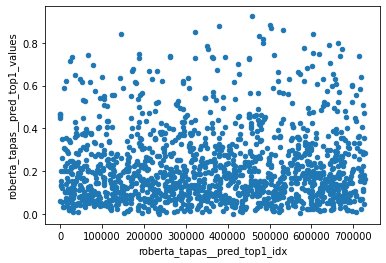

In [33]:
df['roberta_tapas__pred_top1_idx'] = df['roberta_tapas__pred_topk_idxs'].apply(lambda L: L[0])
df['roberta_tapas__pred_top1_values'] = df['roberta_tapas__pred_topk_values'].apply(lambda V: V[0])
df[~df['roberta_tapas__was_correct']].plot(x='roberta_tapas__pred_top1_idx', y='roberta_tapas__pred_top1_values', kind='scatter')

In [34]:
bugs_a = df[df['roberta_roberta__was_correct'] & ~df['roberta_tapas__was_correct']]
bugs_a['perturbed_text'].apply(lambda s: s.count(' ')).mean()
bugs_a = bugs_a.reset_index()

In [36]:
for _, p in bugs_a.iterrows():
    print('idx:', p['i'])
    print('rr:', p['roberta_roberta__pred_topk_idxs'][0], p['roberta_roberta__pred_topk_values'][0])
    print('rt:', p['roberta_tapas__pred_topk_idxs'][0], p['roberta_tapas__pred_topk_values'][0])
    print('*' * 32)
    print(p['perturbed_text'].strip())
    print('*' * 32)
    print('\n' * 2)
    
    if _ > 10: break

idx: 1
rr: 1 0.9647166728973389
rt: 627677 0.18824410438537598
********************************
<mask> <mask> ( born 25 august <mask> in rhèges ) is a member of the senate of france .
he was first elected in 1989 , and represents the aube department .
a farmer by profession , he serves as an independent , and also serves as the head of the general council of aube , to which he was elected to represent the canton of méry-sur-seine in 1980 .
in 1998 and 2008 , he was re-elected to the senate in the first round , avoiding the need for a run-off vote .
having contributed to the creation of the university of technology of troyes , in 1998 he was made the first vice president of the university board , of which he is currently the president .
he is a member of the senate 's committee on the laws relating to the freedoms and responsibilities of universities .
as of 2009 , he serves as the delegate from the administrative meeting for senators not on the list of another group he is decorated as 

In [53]:
bugs_b = df[~df['roberta_roberta__was_correct'] & df['roberta_tapas__was_correct']].reset_index()
bugs_b['perturbed_text'].apply(lambda s: s.count(' ')).mean()

113.60902255639098

In [54]:
len(bugs_b)

266

In [ ]:
for _, p in bugs_b.iterrows():
    print('idx:', p['i'])
    print('rr:', p['roberta_roberta__pred_topk_idxs'][0], p['roberta_roberta__pred_topk_values'][0])
    print('rt:', p['roberta_tapas__pred_topk_idxs'][0], p['roberta_tapas__pred_topk_values'][0])
    print('*' * 32)
    print(p['perturbed_text'].strip())
    print('*' * 32)
    print('\n' * 2)
    if _ > 50: break

In [39]:
import sys
sys.path.append('/home/jxm3/research/deidentification/unsupervised-deidentification')

from model import AbstractModel, CoordinateAscentModel

from model_cfg import model_paths_dict

rt = CoordinateAscentModel.load_from_checkpoint(model_paths_dict['model_3_2'])
rr = CoordinateAscentModel.load_from_checkpoint(model_paths_dict['model_3_3__placeholder'])

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Initialized model with learning_rate = 0.0001 and patience 6


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaMod

Initialized model with learning_rate = 0.0001 and patience 6


In [42]:
import torch
from utils import get_profile_embeddings_by_model_key

def get_profile_embeddings(model_key: str):
    profile_embeddings = get_profile_embeddings_by_model_key(model_key=model_key)

    print("concatenating train, val, and test profile embeddings")
    all_profile_embeddings = torch.cat(
        (profile_embeddings['test'], profile_embeddings['val'], profile_embeddings['train']), dim=0
    )

    print("all_profile_embeddings:", all_profile_embeddings.shape)
    return all_profile_embeddings

rt_profile_embeddings = get_profile_embeddings('model_3_2')
rr_profile_embeddings = get_profile_embeddings('model_3_3__placeholder')

>> loaded 582659 train embeddings from /home/jxm3/research/deidentification/unsupervised-deidentification/embeddings/profile/model_3_2/train.pkl
>> loaded 72831 val embeddings from /home/jxm3/research/deidentification/unsupervised-deidentification/embeddings/profile/model_3_2/val.pkl
>> loaded 72831 test embeddings from /home/jxm3/research/deidentification/unsupervised-deidentification/embeddings/profile/model_3_2/test.pkl
concatenating train, val, and test profile embeddings
all_profile_embeddings: torch.Size([728321, 3072])
>> loaded 582659 train embeddings from /home/jxm3/research/deidentification/unsupervised-deidentification/embeddings/profile/model_3_3__placeholder/train.pkl
>> loaded 72831 val embeddings from /home/jxm3/research/deidentification/unsupervised-deidentification/embeddings/profile/model_3_3__placeholder/val.pkl
>> loaded 72831 test embeddings from /home/jxm3/research/deidentification/unsupervised-deidentification/embeddings/profile/model_3_3__placeholder/test.pkl
co

In [58]:
import torch
import transformers

class ModelWrapper:
    model: AbstractModel
    document_tokenizer: transformers.AutoTokenizer
    profile_embeddings: torch.Tensor
    max_seq_length: int
    
    def __init__(self,
            model: AbstractModel,
            document_tokenizer: transformers.AutoTokenizer,
            profile_embeddings: torch.Tensor,
            max_seq_length: int = 128
        ):
        self.model = model
        self.model.eval()
        self.document_tokenizer = document_tokenizer
        self.profile_embeddings = profile_embeddings.clone().detach()
        self.max_seq_length = max_seq_length
                 
    def to(self, device):
        self.model.to(device)
        self.profile_embeddings = self.profile_embeddings.to(device)
        return self # so semantics `model = MyModelWrapper().to('cuda')` works properly

    def __call__(self, text_input_list):
        model_device = next(self.model.parameters()).device

        tokenized_documents = self.document_tokenizer.batch_encode_plus(
            text_input_list,
            max_length=self.max_seq_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
        )
        batch = {f"document__{k}": v for k,v in tokenized_documents.items()}

        with torch.no_grad():
            document_embeddings = self.model.forward_document(batch=batch, document_type='document')
            document_to_profile_logits = document_embeddings @ (self.profile_embeddings.T)
        # breakpoint()
        assert document_to_profile_logits.shape == (len(text_input_list), len(self.profile_embeddings))
        return document_to_profile_logits

    
rt_mw = ModelWrapper(rt, dm.document_tokenizer, rt_profile_embeddings).to('cuda')
rr_mw = ModelWrapper(rr, dm.document_tokenizer, rr_profile_embeddings).to('cuda')

In [85]:
def call_rr(s: str):
    probs = rr_mw([s]).softmax(1)
    return (label_names[probs.argmax()], probs.argmax().item(), probs.max().item())

def call_rt(s: str):
    probs = rt_mw([s]).softmax(1)
    return (label_names[probs.argmax()], probs.argmax().item(), probs.max().item())

In [69]:
s = """<mask> <mask> ( born september 5 , 1980 ) is a retired angolan football player .
he has played for angola national team ."""

In [83]:
call_rr(s)

('Renato Campos', 8, 0.9660568833351135)

In [71]:
call_rt(s)

('Renato Campos', tensor(8, device='cuda:0'), tensor(14.1193, device='cuda:0'))

In [72]:
call_rt("""shashi gupta ( born 3 april 1964 in delhi , india ) is a former test and one day international cricketer who represented india .
<mask> played a total of 13 tests and 20 odis .""")

('V. Kalpana',
 tensor(105389, device='cuda:0'),
 tensor(11.3553, device='cuda:0'))

In [86]:
call_rr("""shashi gupta ( born 3 april 1964 in delhi , india ) is a former test and one day international cricketer who represented india .
<mask> played a total of 13 tests and 20 odis .""")

('Shashi Gupta', 22, 0.973254382610321)

In [87]:
call_rt("""<mask> <mask> ( born 8 august 1974 ) is an english actor .""")

('Joseph Gatt', 636213, 0.2938927412033081)

In [88]:
call_rr("""<mask> <mask> ( born 8 august 1974 ) is an english actor .""")

('Enzo Cilenti', 26, 0.9484702944755554)

In [89]:
call_rt("""<mask> <mask> ( born 8 august 1974 ) is an english actor .""")

('Joseph Gatt', 636213, 0.2938927412033081)

In [90]:
call_rt("""<mask> <mask> ( born 7 june 1987 in diyarbakır ) is a turkish footballer currently playing for <mask> .
he previously played for dutch side fc volendam .""")

('Abdülhamit Yıldız', 52, 0.3911619484424591)

In [103]:
call_rr("""<mask> <mask> ( born 7 june 1987 in diyarbakır ) is a turkish footballer currently playing for <mask> .
<mask> <mask> played for dutch side fc volendam .""")

('Volkan Şen', 102010, 0.19035562872886658)

In [105]:
call_rt("""<mask> <mask> <mask> <mask> ( born <mask> <mask> <mask> in portimão ) is a portuguese footballer who plays for portimonense s.c. as a midfielder .""")

('André Salvador', 17, 0.7410120368003845)

In [106]:
call_rt("""<mask> <mask> ( born december 31 , <mask> ) is an american javelin <mask> .
he currently attends the university of <mask> .
while a senior at gresham high school , <mask> was named gatorade high school track and field <mask> of the year 2010 .
on may 1 , 2010 , he set the national high school record at 244 ' 2 '' ( 74.42 m ) .
this was broken in 2012 by billy stanley of south park , pa. .
he competed javelin at the 2012 olympic trials in eugene , oregon .
he was ranked # 6 in the us three years in a row , 2012 to 2014 .
his uncle brian crouser competed in the javelin throw at the 1988 and 1992 summer olympics .
in 2011 , cousin ryan crouser joined sam , setting the national high school record in the discus throw for cross town rival sam barlow high school .
then in 2012 , sister haley completed the family trifecta by setting the national high school record in the girl 's javelin throw .""")

('Craig Kinsley', 105923, 0.5525273680686951)

In [122]:
call_rr("""<mask> <mask> ( born december <mask> , <mask> ) is an <mask> <mask> <mask> .
he currently attends the university of <mask> .
while a <mask> at gresham high school , <mask> was named gatorade high school track and field <mask> of the year <mask> .
on may 1 , 2010 , he set the national high school record at <mask> ' 2 '' ( 74.42 m ) .
this was broken in <mask> by billy stanley of south park , pa. .
he competed javelin at the 2012 olympic trials in <mask> , <mask> .
he was ranked # 6 in the us three years in a row , <mask> to 2014 .""")

('Sam Crouser', 87, 0.3870806396007538)